# Numerical Problem

Bomber plane drops bomb directly over target, strong horizontal wind. H = 50,000ft (15,240m). Assume wind is blowing horizontally through entire space below the plane with a wind speed of 60mph (26.8224 m/s), and air density does not have altitude variance. Mass of bomb is 100kg, radius of 0.2m.

**a) Calculate required *ground speed* of plane if bomb is to strike target**

**b) Plot trajectory of bomb. Explain why "trailing side" of trajectory is linear.**

In [1]:
# populate the interactive namespace with functions 
# from the modules numpy and matplotlib
%pylab nbagg

# the following commands allow to produce a nice pdf version of 
# the notebook with figures:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# populate the interactive namespace with the function 
# that solves ODEs
from scipy.integrate import odeint
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib


In [2]:
Cd = 0.47  # the dimensionless air-drag coefficient
r = 0.2  # ball's radius in m
m = 100.  # ball's mas in kg
vw = 26.8224 # wind speed, 60mph in m/s
h = 15240 # initial height, 50 000 ft in m
A = pi*r**2  # ball's cross-section area in m**2

g = 9.8  # the gravitational accelation on the surface of Earth (in m/s**2)

c2 = 0.5*Cd*A

# the coefficients in the ODEs
a = -g
b = -c2/m

vplane = 80  # guessed number, bomb's initial velocity in m/s

# the integration time interval
t_start = 0.
t_end = 100 # adjust t_end, using the plot below, 
# such that the bomb's final height is negative
nt = 10000 # the number of integration time steps

t = linspace(t_start, t_end, nt)
y0 = [0.0, vplane, h, 0]

In [3]:
# the function defining the right-hand sides of the ODEs
def dy_dt(y, t, a, b, vw):
    y1, y2, y3, y4 = y
    dydt = [y2, b*(y2+vw)*sqrt((y2+vw)**2+y4**2), y4, a+b*y4*sqrt((y2+vw)**2+y4**2)]
    return dydt

In [4]:
# solve the ODEs
# the coefficients a and b are defined above
sol = odeint(dy_dt, y0, t, args=(a, b, vw))

In [5]:
# select a part of the solution with the heights
# between y=sol[1,2] > 0. and y=0

__h = sol[1,2]
k = 0
while __h > 0.:
    k += 1
    __h = sol[k,2]
    
k = k+2

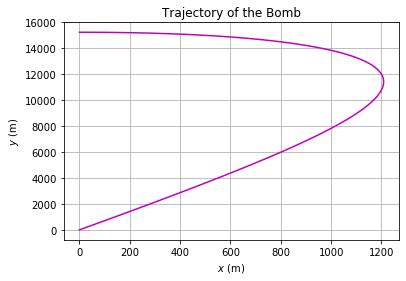

The ground speed of the plane was found to be 80 m/s


In [6]:
# plot bomb's height as a function of time
figure(1)

plot(sol[0:k, 0], sol[0:k, 2], 'm')
xlabel('$x\ (\mathrm{m})$')
ylabel('$y\ (\mathrm{m})$')
grid()
title("Trajectory of the Bomb")
show()

print("The ground speed of the plane was found to be 80 m/s")

While the x-component of the velocity is not linear throughout the trajectory, the y-component approaches terminal velocity after the turning point, and therefore the y-component becomes linear. This can be seen in the plot below.

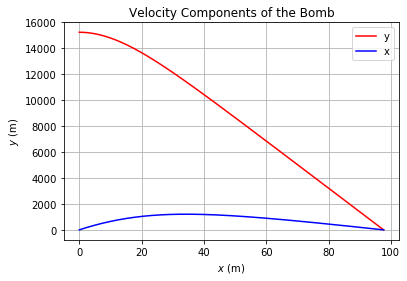

In [7]:
# plot bomb's y and x velocity components as a function of time
figure(2)

plot(t[0:k], sol[0:k, 2], 'r', label='y')
plot(t[0:k], sol[0:k, 0], 'b', label='x')
xlabel('$x\ (\mathrm{m})$')
ylabel('$y\ (\mathrm{m})$')
legend(loc='upper right')
grid()
title("Velocity Components of the Bomb")
show()

**c) How precisely should the pilot control the speed of the plane for the bomb to strike within 100m of the target?**

In [8]:
vel_range = linspace(74,86,300)  # with wind

for vel in vel_range:

    y0 = [0.0, vel, h, 0]
    
    _sol = odeint(dy_dt, y0, t, args=(a, b, vw))

    # select a part of the solution with the heights 
    # between y=sol[1,2] > 0. and y=0

    _h = _sol[1,2]
    k = 0
    while _h > 0.:
        k += 1
        _h = _sol[k,2]
    
    k = k+10

    fx = interp1d(_sol[1:-1,2],sol[1:-1,0])
    ft = interp1d(_sol[1:-1,2],t[1:-1])
    if 99.<=abs(fx(0))<=100:
        print(vel)
        print(fx(0))

The answers from 'vel' and 'fx(0)' should produce the following values:

In [9]:
print("Velocity: 74.8284 m/s")
print("Position: -99.9332 m")
print("Velocity: 85.2976 m/s")
print("Position: 99.9453 m")
print("std: 5.2346")

Velocity: 74.8284 m/s
Position: -99.9332 m
Velocity: 85.2976 m/s
Position: 99.9453 m
std: 5.2346


In [10]:
vel_ave = 0.5*abs(74.8284 - 85.2976) + 74.8284
print("The average speed of the trajectory should be: " , vel_ave)

The average speed of the trajectory should be:  80.063


## The pilot should make the speed of the trajectory be within the range (80 $\pm$ 5) m/s.